<a href="https://colab.research.google.com/github/xpTianLZJT/AI/blob/main/%E2%80%9C1A_Tic_Tac_Toe_ipynb%E2%80%9D_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 55.3 MB/s eta 0:00:00


In [ ]:
import pulp

# Create a new LP problem
model = pulp.LpProblem("Tic-Tac-Toe", pulp.LpMaximize)

# Defining the variables (for simplicity, we consider only a few cells and one turn)
x_11 = pulp.LpVariable('x_11', cat='Binary')
x_12 = pulp.LpVariable('x_12', cat='Binary')
x_13 = pulp.LpVariable('x_13', cat='Binary')

# Define the current state of the board (for example, let's assume these are already filled)
# In a real scenario, these would be parameters, not variables
o_11 = 0  # Cell (1,1) is empty
o_12 = 1  # Cell (1,2) is filled by O
o_13 = 0  # Cell (1,3) is empty

# Objective Function
# For simplicity, we'll assume Player X wants to maximize their presence on the board
model += x_11 + x_12 + x_13

# Constraints
# For this example, let's add a simple constraint that only one cell can be marked by X
model += x_11 + x_12 + x_13 <= 1

# Existing state constraints (these cells are already filled by O, so X can't mark them)
model += x_12 == 0

# Solve the model
model.solve()

# Output the results
for v in model.variables():
    print(v.name, "=", v.varValue)

print("Status:", pulp.LpStatus[model.status])


x_11 = 1.0
x_12 = 0.0
x_13 = 0.0
Status: Optimal


Updated Python Code with Time Index and Opponent Variables:

In [ ]:
import pulp

# Time steps
T = 4  # For example, we are looking at the 5th move

# Create a new LP problem
model = pulp.LpProblem("Tic-Tac-Toe-Time-Indexed", pulp.LpMaximize)

# Defining the variables with time index for both players X and O
x = pulp.LpVariable.dicts("x", [(i, j, t) for i in range(1, 4) for j in range(1, 4) for t in range(1, T + 1)], cat='Binary')
o = pulp.LpVariable.dicts("o", [(i, j, t) for i in range(1, 4) for j in range(1, 4) for t in range(1, T + 1)], cat='Binary')

# Example current state at t-1 (turn 4)
# Let's assume some cells are already marked by X and O
# These would typically come from the actual game state
current_state_x = {
    (1, 1, 1): 1, (1, 2, 1): 0, (1, 3, 1): 0,
    (2, 1, 1): 0, (2, 2, 1): 0, (2, 3, 1): 0,
    (3, 1, 1): 0, (3, 2, 1): 0, (3, 3, 1): 0,
    # ... continue for each cell and time up to t-1
}
# dictionary 'current_state_x' is the current state of player x

current_state_o = {
    (1, 1, 1): 0, (1, 2, 1): 0, (1, 3, 1): 0,
    (2, 1, 1): 0, (2, 2, 1): 1, (2, 3, 1): 0,
    (3, 1, 1): 0, (3, 2, 1): 0, (3, 3, 1): 0,
    # ... continue for each cell and time up to t-1
}
# dictionary 'current_state_o' is the current state of player o

# Applying the current state to our variables
for cell, marked in current_state_x.items():
    if marked:
        model += x[cell] == 1
        model += o[cell] == 0
    else:
        model += x[cell] + o[cell] <= 1  # Cell can't be marked by both players

for cell, marked in current_state_o.items():
    if marked:
        model += x[cell] == 0
        model += o[cell] == 1
    else:
        model += x[cell] + o[cell] <= 1  # Cell can't be marked by both players

# Objective Function
# Assuming Player X wants to maximize their presence on the board at time T
model += pulp.lpSum([x[i, j, T] for i in range(1, 4) for j in range(1, 4)])

# Constraints
# Only one mark per player per turn
for t in range(2, T + 1):
  model += pulp.lpSum([x[i, j, t] for i in range(1, 4) for j in range(1, 4)]) == 1  #Player x can only choose one cell in Turn t.
  model += pulp.lpSum([o[i, j, t] for i in range(1, 4) for j in range(1, 4)]) == 1  #Player o can only choose one cell in Turn t.

for i in range(1,4):
  for j in range(1,4):
    model += pulp.lpSum([x[i, j, t]+o[i, j, t] for t in range(1, T + 1)]) <= 1  #Each cell can be used at most once

# Solve the model
model.solve()

# Output the results
for t in range(1, T + 1):
    print(f"Turn {t}:")
    for i in range(1, 4):
        for j in range(1, 4):
            print(f"Cell ({i}, {j}): X = {x[i, j, t].varValue}, O = {o[i, j, t].varValue}")
    print("")

print("Status:", pulp.LpStatus[model.status])


Turn 1:
Cell (1, 1): X = 1.0, O = 0.0
Cell (1, 2): X = 0.0, O = 0.0
Cell (1, 3): X = 0.0, O = 0.0
Cell (2, 1): X = 0.0, O = 0.0
Cell (2, 2): X = 0.0, O = 1.0
Cell (2, 3): X = 0.0, O = 0.0
Cell (3, 1): X = 0.0, O = 0.0
Cell (3, 2): X = 0.0, O = 0.0
Cell (3, 3): X = 0.0, O = 0.0

Turn 2:
Cell (1, 1): X = 0.0, O = 0.0
Cell (1, 2): X = 0.0, O = 0.0
Cell (1, 3): X = 0.0, O = 0.0
Cell (2, 1): X = 0.0, O = 1.0
Cell (2, 2): X = 0.0, O = 0.0
Cell (2, 3): X = 0.0, O = 0.0
Cell (3, 1): X = 1.0, O = 0.0
Cell (3, 2): X = 0.0, O = 0.0
Cell (3, 3): X = 0.0, O = 0.0

Turn 3:
Cell (1, 1): X = 0.0, O = 0.0
Cell (1, 2): X = 0.0, O = 0.0
Cell (1, 3): X = 1.0, O = 0.0
Cell (2, 1): X = 0.0, O = 0.0
Cell (2, 2): X = 0.0, O = 0.0
Cell (2, 3): X = 0.0, O = 0.0
Cell (3, 1): X = 0.0, O = 0.0
Cell (3, 2): X = 0.0, O = 1.0
Cell (3, 3): X = 0.0, O = 0.0

Turn 4:
Cell (1, 1): X = 0.0, O = 0.0
Cell (1, 2): X = 1.0, O = 0.0
Cell (1, 3): X = 0.0, O = 0.0
Cell (2, 1): X = 0.0, O = 0.0
Cell (2, 2): X = 0.0, O = 0.0
Cell 

#1 Illustration for current state
* dictionary 'current_state_x' is the current state of player x
current_state_x = {
    (1, 1, 1): 1, (1, 2, 1): 0, (1, 3, 1): 0,
    (2, 1, 1): 0, (2, 2, 1): 0, (2, 3, 1): 0,
    (3, 1, 1): 0, (3, 2, 1): 0, (3, 3, 1): 0,   
}

* dictionary 'current_state_o' is the current state of player o
current_state_o = {
    (1, 1, 1): 0, (1, 2, 1): 0, (1, 3, 1): 0,
    (2, 1, 1): 0, (2, 2, 1): 1, (2, 3, 1): 0,
    (3, 1, 1): 0, (3, 2, 1): 0, (3, 3, 1): 0,
}

* The corresponding picture:

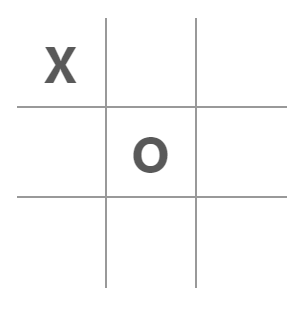
